# What is Pokemon? 

Pokemon is a video that is adored by people young and old. It is actually the highest grossing media franchise of all time - beating Hello Kitty, Marvel and Star Wars all by BILLIONS of dollars!

For anyone unfamilar with the game, According to Wikipedia: In Pokémon, humans, known as Pokémon Trainers, catch and train Pokémon to battle other Pokémon for sport.

The data I am using is a complete overview of Pokedex information for all Pokemon from Generation 1 through to Generation 8. The data contains each individual pokemons stats as well as information on what types they are strong against.

I am very interested to analyse this data and find the answer to my question: what pokemon are the top when it comes to stats, and what types should be first in mind when assembling a team that is guaranteed to get you through the final battles?




In [1]:
import os
import pandas as pd
import statistics as st
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

In [2]:
df = pd.read_csv("pythonProjectPokemon.csv") # read csv into dataframe

In [3]:
df.head() # show the first 5 rows of the dataframe

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


So i can see that there are a lot of columns that I am not seeing as this Dataframe has 51 columns, so lets take a look at the shape and an overview of the information our Dataframe:

In [4]:
df.info() #get an overview of our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   german_name       1045 non-null   object 
 4   japanese_name     1045 non-null   object 
 5   generation        1045 non-null   int64  
 6   status            1045 non-null   object 
 7   species           1045 non-null   object 
 8   type_number       1045 non-null   int64  
 9   type_1            1045 non-null   object 
 10  type_2            553 non-null    object 
 11  height_m          1045 non-null   float64
 12  weight_kg         1044 non-null   float64
 13  abilities_number  1045 non-null   int64  
 14  ability_1         1042 non-null   object 
 15  ability_2         516 non-null    object 
 16  ability_hidden    813 non-null    object 


In [5]:
df.shape # check the rows and columns of our dataframe

(1045, 51)

Now that we have an overview of the shape and details of our dataframe, Lets take a quick look for any NaN values across the entire data frame:

In [6]:
df_na = df[df.isna().any(axis=1)] # check for NaN values across the entire dataframe
df_na.shape

(962, 51)

YIKES.... Well this doesn't look good! There seem to be a lot of null values, lets take a more detailed look at where these null values live:

In [7]:
dfPoke = df.isnull().sum() # getting the sum all null values per column
dfPoke[dfPoke > 0] #only show me the values per column that are greater than 1 

type_2             492
weight_kg            1
ability_1            3
ability_2          529
ability_hidden     232
catch_rate          18
base_friendship    115
base_experience    120
growth_rate          1
egg_type_1           3
egg_type_2         760
percentage_male    173
egg_cycles           1
dtype: int64

Now we can see the columns that are causing the Null values. A lot of these columns were things that were introduced in later generations so this makes sense as to why they are causing nulls. I am going to remove every column that contains null data, as most of them are columns I don't require, with the exception of Type 2 and Weight but we will get to that in a moment. Lets remove these columns:

In [8]:
df.drop(columns=['ability_1', 'ability_2', 'ability_hidden', 'base_friendship', 'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1', 'egg_type_2', 'percentage_male'], inplace=True) #Drop these columns, Overwrite the previous DataFrame  
df.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


Now that we have those columns with Null Values that we don't require removed lets take a look at the other two. Lets start with Weight. Weight is definitely something I want to factor into my analysis and there is onl 1 null value under this column. Lets look at what Pokemon contains this null value:

In [9]:
df[df['weight_kg'].isna()] # find pokemon with a null value in the weight column


,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1033,1033,890,Eternatus Eternamax,Endynalos,ムゲンダイナ (Mugendina),8,Legendary,Gigantic Pokémon,2,Poison,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


Now we can see the Pokemon with a Null value for weight is 'Eternatus Eternamax'. The Pokemon has a status of Legendary which is also something we will analyze shortly so we will just keep this in mind for now. 
So now for the next one - Type 2. Lets take a look at Type 2 and where those null values are: 

In [10]:
df[df['type_2'].isna()] #show all Pokemon with a NaN/Null under Type 2 column

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
5,5,5,Charmeleon,Glutexo,リザード (Lizardo),1,Normal,Flame Pokémon,1,Fire,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
9,9,7,Squirtle,Schiggy,ゼニガメ (Zenigame),1,Normal,Tiny Turtle Pokémon,1,Water,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
10,10,8,Wartortle,Schillok,カメール (Kameil),1,Normal,Turtle Pokémon,1,Water,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
11,11,9,Blastoise,Turtok,カメックス (Kamex),1,Normal,Shellfish Pokémon,1,Water,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,1034,891,Kubfu,Dakuma,ダクマ (Dakuma),8,Sub Legendary,Wushu Pokémon,1,Fighting,...,1.0,2.0,2.0,0.5,0.5,1.0,1.0,0.5,1.0,2.0
1038,1038,894,Regieleki,Regieleki,レジエレキ (Regieleki),8,Sub Legendary,Elektron Pokémon,1,Electric,...,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
1039,1039,895,Regidrago,Regidrago,レジドラゴ (Regidrago),8,Sub Legendary,Dragon Orb Pokémon,1,Dragon,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0
1040,1040,896,Glastrier,Polaross,ブリザポス (Burizaposu),8,Sub Legendary,Wild Horse Pokémon,1,Ice,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0


In [11]:
df['type_2'] = df['type_2'].fillna(0) # replace all NaN values in type_2 column with a 0

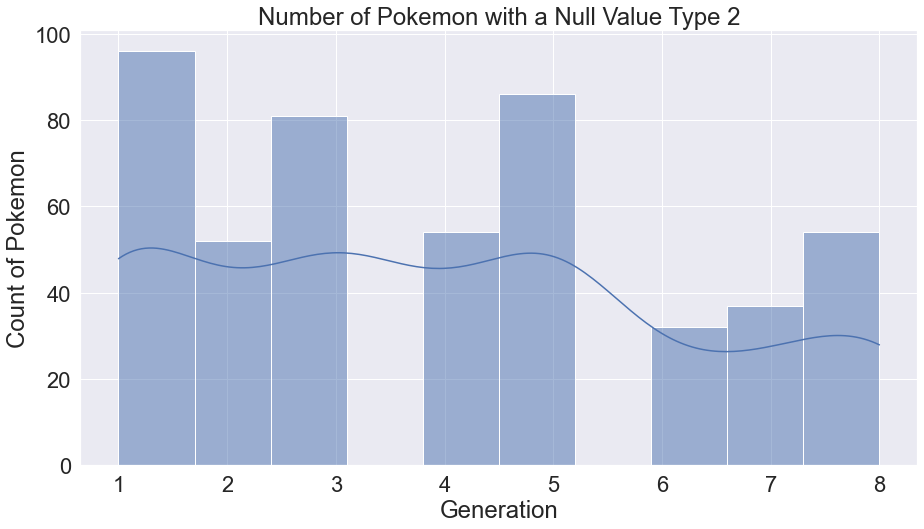

In [12]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2)
sns.set_style('darkgrid')
type2 = df[df['type_2'] == 0] 
type2Chart = sns.histplot(data=type2, 
             x='generation', 
             kde=True) # show pokemon with a 0 for type_2 across each generation
type2Chart.set(xlabel='Generation', ylabel='Count of Pokemon', title='Number of Pokemon with a Null Value Type 2');


So we can see that Type 2 is quite a generational thing, not so big in the early days and became more popular later on in the game. We will leave this column in our data for now and possibly analyse it later.  

Now that we have dealt with out NaN values, lets get to some more unneeded columns. Lets drop those now:

In [13]:
df.drop(columns=['Unnamed: 0', 'german_name', 'japanese_name', 'egg_cycles', 'pokedex_number', 'catch_rate', 'abilities_number', 'type_number'], inplace=True) # Drop these columns and overwrite the previous DataFrame. 
df.head()

,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,Bulbasaur,1,Normal,Seed Pokémon,Grass,Poison,0.7,6.9,318,45,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,1,Normal,Seed Pokémon,Grass,Poison,1.0,13.0,405,60,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,1,Normal,Seed Pokémon,Grass,Poison,2.0,100.0,525,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Mega Venusaur,1,Normal,Seed Pokémon,Grass,Poison,2.4,155.5,625,80,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Charmander,1,Normal,Lizard Pokémon,Fire,0,0.6,8.5,309,39,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [14]:
df.shape
# get the shape of the data so we can do a manual check if the columns have dropped by the correct number 

(1045, 33)

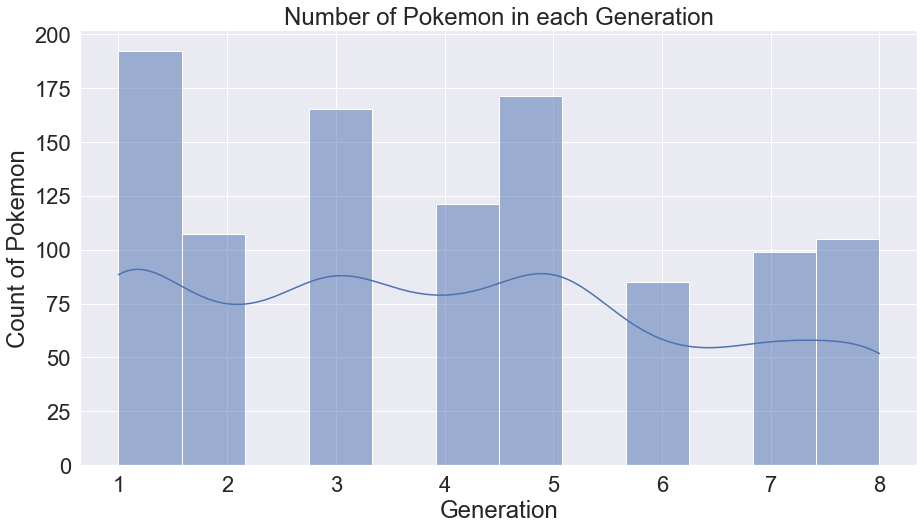

In [15]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2)
sns.set_style('darkgrid')
TotalPokePoints = sns.histplot(data=df, x='generation', kde=True)
TotalPokePoints.set(xlabel='Generation', ylabel='Count of Pokemon', title='Number of Pokemon in each Generation');

In [16]:
df.nlargest(n=10, columns=['total_points']) # find the top 10 pokemon with the highest total points

,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1033,Eternatus Eternamax,8,Legendary,Gigantic Pokémon,Poison,Dragon,100.0,NaN,1125,255,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0
194,Mega Mewtwo X,1,Legendary,Genetic Pokémon,Psychic,Fighting,2.3,127.0,780,106,...,1.0,2.0,1.0,1.00,0.50,2.0,1.0,1.0,1.0,2.0
195,Mega Mewtwo Y,1,Legendary,Genetic Pokémon,Psychic,0,1.5,33.0,780,106,...,1.0,1.0,0.5,2.00,1.00,2.0,1.0,2.0,1.0,1.0
464,Mega Rayquaza,3,Legendary,Sky High Pokémon,Dragon,Flying,10.8,392.0,780,105,...,0.0,1.0,1.0,0.50,1.00,1.0,2.0,1.0,1.0,2.0
460,Primal Kyogre,3,Legendary,Sea Basin Pokémon,Water,0,9.8,430.0,770,100,...,1.0,1.0,1.0,1.00,1.00,1.0,1.0,1.0,0.5,1.0
462,Primal Groudon,3,Legendary,Continent Pokémon,Ground,Fire,5.0,999.7,770,100,...,2.0,1.0,1.0,0.50,1.00,1.0,1.0,1.0,0.5,0.5
936,Ultra Necrozma,7,Legendary,Prism Pokémon,Psychic,Dragon,7.5,230.0,754,97,...,1.0,1.0,0.5,2.00,1.00,2.0,2.0,2.0,1.0,2.0
590,Arceus,4,Mythical,Alpha Pokémon,Normal,0,3.2,320.0,720,120,...,1.0,1.0,1.0,1.00,1.00,0.0,1.0,1.0,1.0,1.0
1028,Zacian Crowned Sword,8,Legendary,Warrior Pokémon,Fairy,Steel,2.8,355.0,720,92,...,2.0,0.5,0.5,0.25,0.50,1.0,0.0,0.5,1.0,0.5
1030,Zamazenta Crowned Shield,8,Legendary,Warrior Pokémon,Fighting,Steel,2.9,785.0,720,92,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0


Okay so, from looking at the top 10 Pokemon with the highest total stats i instantly notice a pattern - All of their Status is Legendary. Lets check out the bottom 10 and see what their status is:

In [17]:
df.nsmallest(n=10, columns=['total_points']) # find the 10 pokemon with the lowest total points

,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
877,Wishiwashi Solo Form,7,Normal,Small Fry Pokémon,Water,0,0.2,0.3,175,45,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
237,Sunkern,2,Normal,Seed Pokémon,Grass,0,0.3,1.8,180,30,...,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
960,Blipbug,8,Normal,Larva Pokémon,Bug,0,0.4,8.0,180,25,...,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1009,Snom,8,Normal,Worm Pokémon,Ice,Bug,0.3,3.8,185,30,...,0.5,2.0,1.0,1.0,4.0,1.0,1.0,1.0,2.0,1.0
357,Azurill,3,Normal,Polka Dot Pokémon,Normal,Fairy,0.2,2.0,190,50,...,1.0,1.0,1.0,0.5,1.0,0.0,0.0,0.5,2.0,1.0
484,Kricketot,4,Normal,Cricket Pokémon,Bug,0,0.3,2.2,194,37,...,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
13,Caterpie,1,Normal,Worm Pokémon,Bug,0,0.3,2.9,195,45,...,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
16,Weedle,1,Normal,Hairy Bug Pokémon,Bug,Poison,0.3,3.2,195,40,...,1.0,2.0,2.0,0.5,2.0,1.0,1.0,1.0,1.0,0.5
323,Wurmple,3,Normal,Worm Pokémon,Bug,0,0.3,3.6,195,45,...,0.5,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
338,Ralts,3,Normal,Feeling Pokémon,Psychic,Fairy,0.4,6.6,198,28,...,1.0,1.0,0.5,1.0,1.0,2.0,0.0,1.0,2.0,1.0


Interesting, All of the pokemon with the lowest points have a status of Normal. Lets dig deeper into this status column and check out what it means.

In [18]:
pd.unique(df['status']) # Check each unique value under the Status column

array(['Normal', 'Sub Legendary', 'Legendary', 'Mythical'], dtype=object)

In [19]:
df['count'] = 1
df.groupby(['status']).count()['count'] # Get a count for each unique value under the Status column


status
Legendary         42
Mythical          30
Normal           918
Sub Legendary     55
Name: count, dtype: int64

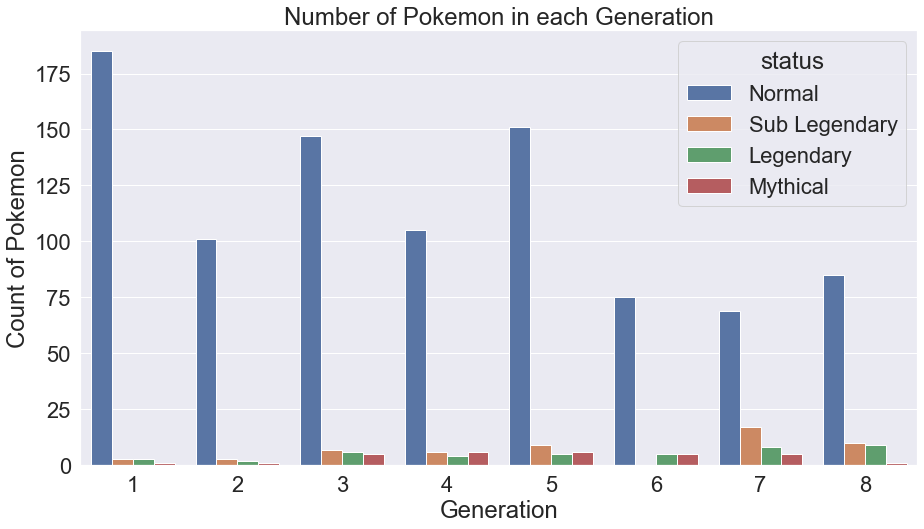

In [20]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2)
sns.set_style('darkgrid') # set the size of the plot
PokeStatus = sns.countplot(x='generation', data=df, hue='status') # set x axis and colour per status
PokeStatus.set(xlabel='Generation', ylabel='Count of Pokemon', title='Number of Pokemon in each Generation'); # label axises and give a title

So we can see that these Legendary and Mythical Pokemon are much less common in our data, which as a Pokemon Fan makes complete sense. Lets do some quick analysis on what having one of these Status's means in terms of our stats - Total points includes: HP(hit or health points), Attack, Defense, Speed, Sp Attack and Sp Defense. 

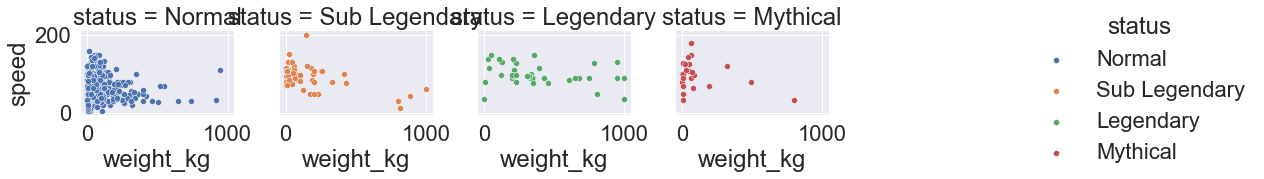

In [21]:
pokeGrid = sns.FacetGrid(data=df, col = 'status', hue = 'status', col_wrap=5) #plot multiple scatter plots, colour by status
pokeGrid.map(sns.scatterplot, 'weight_kg', 'speed') # show correlation between weight and speed

pokeGrid.add_legend() # add a legend for status 

plt.show() 

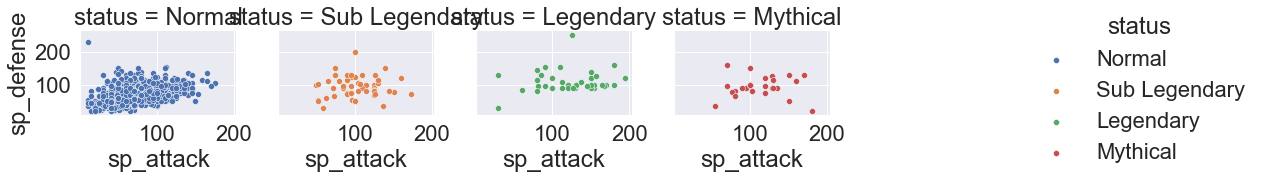

In [22]:
pokeGrid2 = sns.FacetGrid(data=df, col = 'status', hue = 'status', col_wrap=5) # plot multiple scatterplots, colour by status 
pokeGrid2.map(sns.scatterplot, 'sp_attack', 'sp_defense') # show correlation between special attack and special defense

pokeGrid2.add_legend() # add a legend

plt.show()

Lets take a closer look and do some analysis on each of these statuses indivually. Lets start with Mythical - These pokemon are not available in normal gameplay circumstances, they are only available through certain events etc.

In [23]:
df.loc[df.status == 'Mythical', ['name', 'generation', 'status']] # check how many rows/pokemon have the "status" mythical


,name,generation,status
196,Mew,1,Mythical
304,Celebi,2,Mythical
465,Jirachi,3,Mythical
466,Deoxys Normal Forme,3,Mythical
467,Deoxys Attack Forme,3,Mythical
468,Deoxys Defense Forme,3,Mythical
469,Deoxys Speed Forme,3,Mythical
585,Phione,4,Mythical
586,Manaphy,4,Mythical
587,Darkrai,4,Mythical


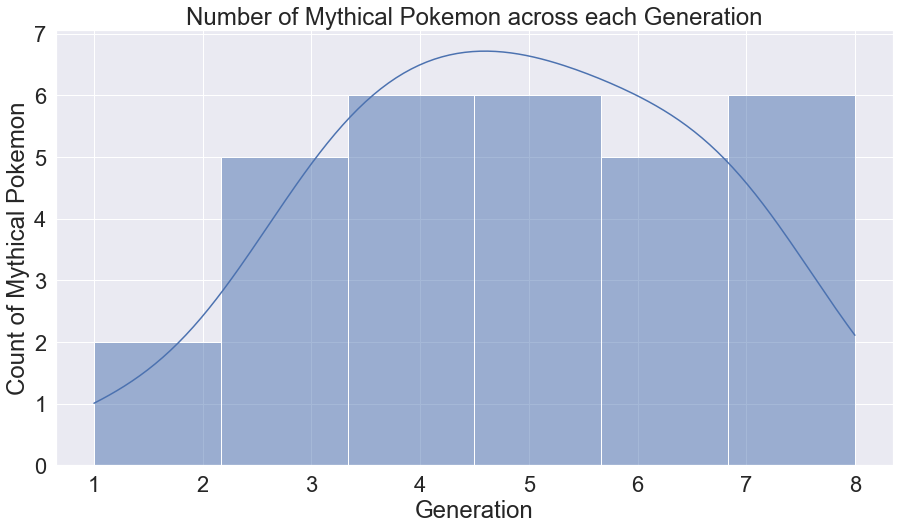

In [24]:
plt.figure(figsize=(15, 8)) # set plot size
sns.set(font_scale=2) # set font size
sns.set_style('darkgrid') # set a dark grid
myth = df[df['status'] == 'Mythical'] 
mythChart = sns.histplot(data=myth, 
                         x='generation', 
                         kde=True) # show the distribution of Pokemon with a status of Mythical over the games Generations
mythChart.set(xlabel='Generation', ylabel='Count of Mythical Pokemon', title='Number of Mythical Pokemon across each Generation');

We can see from our above analysis that Mythical Pokemon are not distrubuted evenly amoungst the generations, and given that they are only accquirable by special means I am going to remove them entirely from our Data.

In [25]:
df = df.loc[~df['status'].str.contains('mythical', flags=re.I, regex=True)]#remove any entries where the string under status contains 'mythical', get every instance regardless of case. 
df.shape #check if the length is correct based on the previous length of our data

(1015, 34)

Now for Legendary Pokemon. Legendary Pokemon are rare and hard to catch, Lets take a look at them on their own: 

In [26]:
df.loc[(df['status'] == 'Legendary')| (df['status'] == 'Sub Legendary')] # create a new Dataframe with only the pokemon with Legendary/Sub Legendary Status
  

,name,generation,status,species,type_1,type_2,height_m,weight_kg,total_points,hp,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,count
184,Articuno,1,Sub Legendary,Freeze Pokémon,Ice,Flying,1.7,55.4,580,90,...,1.0,1.0,0.50,4.0,1.0,1.0,1.0,2.0,1.0,1
185,Galarian Articuno,8,Sub Legendary,Cruel Pokémon,Psychic,Flying,1.7,50.9,580,90,...,1.0,0.5,1.00,2.0,2.0,1.0,2.0,1.0,1.0,1
186,Zapdos,1,Sub Legendary,Electric Pokémon,Electric,Flying,1.6,52.6,580,90,...,0.5,1.0,0.50,2.0,1.0,1.0,1.0,0.5,1.0,1
187,Galarian Zapdos,8,Sub Legendary,Strong Legs Pokémon,Fighting,Flying,1.6,58.2,580,90,...,2.0,2.0,0.25,1.0,1.0,1.0,0.5,1.0,2.0,1
188,Moltres,1,Sub Legendary,Flame Pokémon,Fire,Flying,2.0,60.0,580,90,...,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,Glastrier,8,Sub Legendary,Wild Horse Pokémon,Ice,0,2.2,800.0,580,100,...,1.0,1.0,1.00,2.0,1.0,1.0,1.0,2.0,1.0,1
1041,Spectrier,8,Sub Legendary,Swift Horse Pokémon,Ghost,0,2.0,44.5,580,100,...,1.0,1.0,0.50,1.0,2.0,1.0,2.0,1.0,1.0,1
1042,Calyrex,8,Legendary,King Pokémon,Psychic,Grass,1.1,7.7,500,100,...,2.0,0.5,4.00,1.0,2.0,1.0,2.0,1.0,1.0,1
1043,Calyrex Ice Rider,8,Legendary,High King Pokémon,Psychic,Ice,2.4,809.1,680,100,...,1.0,0.5,2.00,2.0,2.0,1.0,2.0,2.0,1.0,1


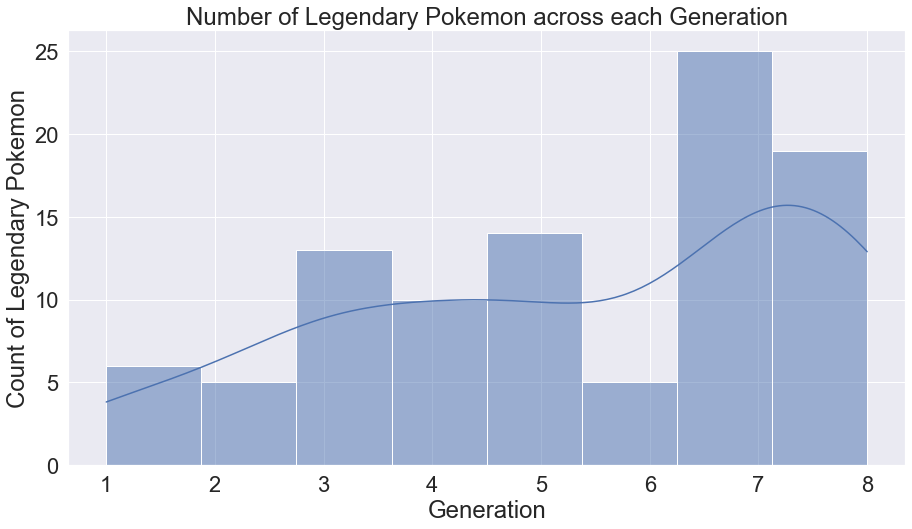

In [27]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=2)
sns.set_style("darkgrid")
legend = df[(df['status'] == 'Legendary') | (df['status'] == 'Sub Legendary')] # create a new Dataframe with only the pokemon with Legendary/Sub Legendary Status 
legendChart = sns.histplot(data=legend,
                           x='generation',
                           kde=True) # show the distribution of Pokemon with a status of Mythical over the games Generations
legendChart.set(xlabel='Generation',ylabel='Count of Legendary Pokemon', title='Number of Legendary Pokemon across each Generation');



In [28]:
legend.shape # check how many rows/pokemon are Legendary/Sub Legendary

(97, 34)

In [29]:
legend['total_points'].mean()

619.2989690721649

In [30]:
df['total_points'].mean()

434.7625615763547

Now we can see that the average of Legendary pokemon is WAY above the average for all pokemon. I believe that the Attack may be a big factor in what is throwing things off because Legendary Pokemon normally have very high attack so lets take a look at attack and also defense.

In [31]:
legend['attack'].mean()

112.4020618556701

In [32]:
df['attack'].mean()

79.64630541871921

In [33]:
legend['defense'].mean()

100.02061855670104

In [34]:
df['defense'].mean()

74.10935960591134

So there we have it, The Legendary Pokemons stats are EXTREMELY high. Given that their distribution across the generations is so low and that there are so few one can have in a single game - Pokemon Blue for example you can only have Mew and if there are any Pokemon fans reading this you will know that thats basically impossible!  - I am going to take them out of my analysis. 

In [35]:
df = df.loc[~df['status'].str.contains('legendary', flags=re.I, regex=True)]#remove any entries where the string under status contains 'legendary', get every instance regardless of case. 
df.shape #check if the length is correct based on the previous length of our data


(918, 34)

In [36]:
df = df[['name', 'generation', 'species',
       'type_1', 'type_2', 'height_m', 'weight_kg',
       'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'status', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy']] # rearrange the columns for better readability
df.head()


,name,generation,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,Bulbasaur,1,Seed Pokémon,Grass,Poison,0.7,6.9,318,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,1,Seed Pokémon,Grass,Poison,1.0,13.0,405,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,1,Seed Pokémon,Grass,Poison,2.0,100.0,525,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Mega Venusaur,1,Seed Pokémon,Grass,Poison,2.4,155.5,625,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Charmander,1,Lizard Pokémon,Fire,0,0.6,8.5,309,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


# Analysis


Now that we have tidied up our data, lets take a look at assembling the Pokemon Dream team ! 

In [37]:
df.nlargest(n=10, columns=['total_points']) # get the 10 pokemon with the highest total points 

,name,generation,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
301,Mega Tyranitar,2,Armor Pokémon,Rock,Dark,2.5,255.0,700,100,164,...,2.0,0.5,0.00,2.00,1.0,0.5,1.0,0.5,2.0,2.0
447,Mega Salamence,3,Dragon Pokémon,Dragon,Flying,1.8,112.6,700,95,145,...,0.0,1.0,1.00,0.50,2.0,1.0,2.0,1.0,1.0,2.0
451,Mega Metagross,3,Iron Leg Pokémon,Steel,Psychic,2.5,942.9,700,80,145,...,2.0,0.5,0.25,1.00,0.5,2.0,0.5,2.0,0.5,0.5
532,Mega Garchomp,4,Mach Pokémon,Dragon,Ground,1.9,95.0,700,108,170,...,1.0,1.0,1.00,1.00,0.5,1.0,2.0,1.0,1.0,2.0
348,Slaking,3,Lazy Pokémon,Normal,0,2.0,130.5,670,150,160,...,1.0,1.0,1.00,1.00,1.0,0.0,1.0,1.0,1.0,1.0
168,Mega Gyarados,1,Atrocious Pokémon,Water,Dark,6.5,305.0,640,95,155,...,1.0,1.0,0.00,2.00,1.0,0.5,1.0,0.5,0.5,2.0
771,Ash-Greninja,6,Ninja Pokémon,Water,Dark,1.5,40.0,640,72,145,...,1.0,1.0,0.00,2.00,1.0,0.5,1.0,0.5,0.5,2.0
316,Mega Swampert,3,Mud Fish Pokémon,Water,Ground,1.9,102.0,635,100,150,...,1.0,1.0,1.00,1.00,0.5,1.0,1.0,1.0,0.5,1.0
7,Mega Charizard X,1,Flame Pokémon,Fire,Dragon,1.7,110.5,634,78,130,...,2.0,1.0,1.00,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,Mega Charizard Y,1,Flame Pokémon,Fire,Flying,1.7,100.5,634,78,104,...,0.0,1.0,1.00,0.25,4.0,1.0,1.0,1.0,0.5,0.5


Hmmmmm.... Almost Every Pokemon in this list has Mega in front of its name! From a quick google search: Mega Evolution is a temporary transformation that affects certain Pokémon. Lets see how many there are: 

In [38]:
dfMega = df.loc[df['name'].str.contains('Mega', flags=re.I, regex=True)] # create a new data with only pokemon that contain the word mega 
dfMega

,name,generation,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
3,Mega Venusaur,1,Seed Pokémon,Grass,Poison,2.4,155.5,625,80,100,...,1.0,2.0,2.00,1.00,1.00,1.0,1.0,1.0,1.0,0.5
7,Mega Charizard X,1,Flame Pokémon,Fire,Dragon,1.7,110.5,634,78,130,...,2.0,1.0,1.00,0.50,2.00,1.0,2.0,1.0,0.5,1.0
8,Mega Charizard Y,1,Flame Pokémon,Fire,Flying,1.7,100.5,634,78,104,...,0.0,1.0,1.00,0.25,4.00,1.0,1.0,1.0,0.5,0.5
12,Mega Blastoise,1,Shellfish Pokémon,Water,0,1.6,101.1,630,79,103,...,1.0,1.0,1.00,1.00,1.00,1.0,1.0,1.0,0.5,1.0
19,Mega Beedrill,1,Poison Bee Pokémon,Bug,Poison,1.4,40.5,495,65,150,...,1.0,2.0,2.00,0.50,2.00,1.0,1.0,1.0,1.0,0.5
23,Mega Pidgeot,1,Bird Pokémon,Normal,Flying,2.2,50.5,579,83,80,...,0.0,1.0,1.00,0.50,2.00,0.0,1.0,1.0,1.0,1.0
84,Mega Alakazam,1,Psi Pokémon,Psychic,0,1.2,48.0,600,55,50,...,1.0,1.0,0.50,2.00,1.00,2.0,1.0,2.0,1.0,1.0
106,Mega Slowbro,1,Hermit Crab Pokémon,Water,Psychic,2.0,120.0,590,95,75,...,1.0,1.0,0.50,2.00,1.00,2.0,1.0,2.0,0.5,1.0
125,Mega Gengar,1,Shadow Pokémon,Ghost,Poison,1.4,40.5,600,60,65,...,2.0,1.0,2.00,0.25,1.00,2.0,1.0,2.0,1.0,0.5
150,Mega Kangaskhan,1,Parent Pokémon,Normal,0,2.2,100.0,590,105,125,...,1.0,1.0,1.00,1.00,1.00,0.0,1.0,1.0,1.0,1.0


So as we can see there are quite a few, but they are all duplicates essentially as they are just another form of a Pokemon already in our Data. For this reason I am going to remove them. Mega is at the begining of every one of these Pokemon but bearing in mind Pokemon can have quite long names mega may appear elsewhere in the pokemon name string - as seen in number 558 Yanmega. So for this reason we will use string starts with:

In [39]:
df = df.loc[~df['name'].str.startswith('Mega')] #remove every pokemon with the string 'Mega' at the start
df

,name,generation,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,Bulbasaur,1,Seed Pokémon,Grass,Poison,0.7,6.9,318,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,1,Seed Pokémon,Grass,Poison,1.0,13.0,405,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,1,Seed Pokémon,Grass,Poison,2.0,100.0,525,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,Charmander,1,Lizard Pokémon,Fire,0,0.6,8.5,309,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
5,Charmeleon,1,Flame Pokémon,Fire,0,1.1,19.0,405,58,64,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,Arctovish,8,Fossil Pokémon,Water,Ice,2.0,175.0,505,90,90,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
1024,Duraludon,8,Alloy Pokémon,Steel,Dragon,1.8,40.0,535,70,95,...,2.0,0.5,0.5,0.5,0.5,1.0,1.0,1.0,0.5,1.0
1025,Dreepy,8,Lingering Pokémon,Dragon,Ghost,0.5,2.0,270,28,60,...,1.0,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0
1026,Drakloak,8,Caretaker Pokémon,Dragon,Ghost,1.4,11.0,410,68,80,...,1.0,1.0,1.0,0.5,1.0,2.0,2.0,2.0,1.0,2.0


In [40]:
dfTopTen = df.nlargest(n=10, columns=['total_points']) # get the top 10 pokemon with the highest total points 
dfTopTen 

,name,generation,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
348,Slaking,3,Lazy Pokémon,Normal,0,2.0,130.5,670,150,160,...,1.0,1.0,1.00,1.0,1.0,0.0,1.0,1.0,1.0,1.0
771,Ash-Greninja,6,Ninja Pokémon,Water,Dark,1.5,40.0,640,72,145,...,1.0,1.0,0.00,2.0,1.0,0.5,1.0,0.5,0.5,2.0
878,Wishiwashi School Form,7,Small Fry Pokémon,Water,0,8.2,78.6,620,45,140,...,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5,1.0
192,Dragonite,1,Dragon Pokémon,Dragon,Flying,2.2,210.0,600,91,134,...,0.0,1.0,1.00,0.5,2.0,1.0,2.0,1.0,1.0,2.0
300,Tyranitar,2,Armor Pokémon,Rock,Dark,2.0,202.0,600,100,134,...,2.0,0.5,0.00,2.0,1.0,0.5,1.0,0.5,2.0,2.0
446,Salamence,3,Dragon Pokémon,Dragon,Flying,1.5,102.6,600,95,135,...,0.0,1.0,1.00,0.5,2.0,1.0,2.0,1.0,1.0,2.0
450,Metagross,3,Iron Leg Pokémon,Steel,Psychic,1.6,550.0,600,80,135,...,2.0,0.5,0.25,1.0,0.5,2.0,0.5,2.0,0.5,0.5
531,Garchomp,4,Mach Pokémon,Dragon,Ground,1.9,95.0,600,108,130,...,1.0,1.0,1.00,1.0,0.5,1.0,2.0,1.0,1.0,2.0
740,Hydreigon,5,Brutal Pokémon,Dark,Dragon,1.8,160.0,600,92,105,...,0.0,1.0,0.00,2.0,1.0,0.5,2.0,0.5,1.0,4.0
821,Goodra,6,Dragon Pokémon,Dragon,0,2.0,150.5,600,90,100,...,1.0,1.0,1.00,1.0,1.0,1.0,2.0,1.0,1.0,2.0


In [41]:
top10Poke = dfTopTen.groupby('type_1').size().sort_values(ascending=False).to_frame()#counting the number of each type are in the top 10, in descending order
top10Poke.columns = ['Number Of Pokemon'] # name the new column

In [42]:
top10Poke

,Number Of Pokemon
type_1,
Dragon,4
Water,2
Dark,1
Normal,1
Rock,1
Steel,1


[Text(0, 0.5, 'Pokemon Type'),
 Text(0.5, 1.0, 'Top 10 Pokemon Types With Highest Total Points')]

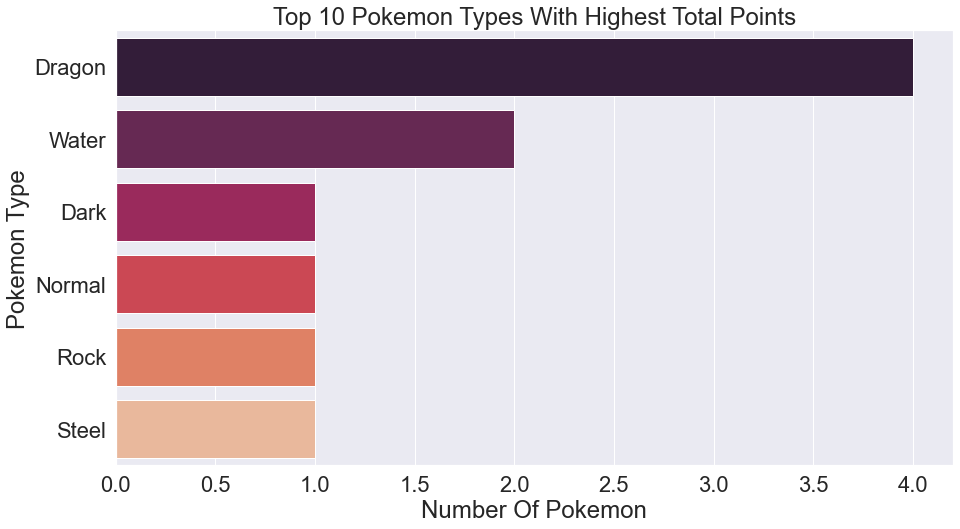

In [43]:
plt.figure(figsize=(15, 8)) # assign plot size
sns.set(font_scale=2) # assign font size 
top10Chart = sns.barplot(data=top10Poke,
             x='Number Of Pokemon',
             y=top10Poke.index, palette="rocket") # use rocket colours
top10Chart.set(ylabel= 'Pokemon Type', title='Top 10 Pokemon Types With Highest Total Points')

In [44]:
dfTopFifty = df.nlargest(n=50, columns=['total_points'])
top50Poke = dfTopFifty.groupby('type_1').size().sort_values(ascending=False).to_frame() #counting the number of each type are in the top 50, in descending order
top50Poke.columns = ['Number Of Pokemon'] # name the new column 
top50Poke

,Number Of Pokemon
type_1,
Water,9
Fire,8
Dragon,7
Grass,5
Normal,4
Ice,3
Steel,3
Electric,2
Fairy,2


[Text(0, 0.5, 'Pokemon Type'),
 Text(0.5, 1.0, 'Top 50 Pokemon Types With Highest Total Points')]

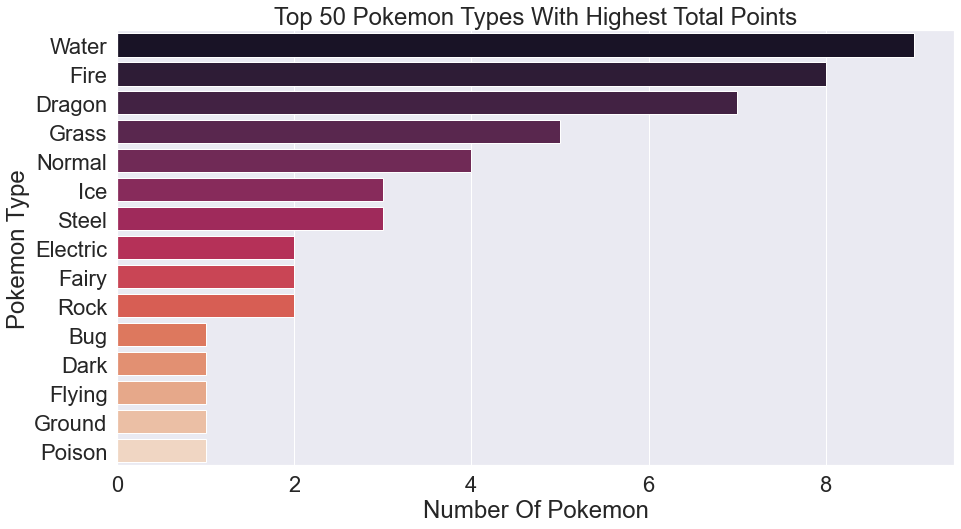

In [45]:
plt.figure(figsize=(15, 8)) # assign plot size
sns.set(font_scale=2) # assign font size 
top50Chart= sns.barplot(data=top50Poke,
            x='Number Of Pokemon',
            y=top50Poke.index, palette="rocket")
top50Chart.set(ylabel='Pokemon Type', title='Top 50 Pokemon Types With Highest Total Points')


In [46]:
col = df.loc[: , 'against_normal':'against_fairy'] # define col as columns x : y ( against normal through against fairy in this case)
df['against_total'] = col.mean(axis=1) # add a new column to the dataframe getting the mean of the variable we just created
df.head() # check our new column is working 

,name,generation,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,against_total
0,Bulbasaur,1,Seed Pokémon,Grass,Poison,0.7,6.9,318,45,49,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444
1,Ivysaur,1,Seed Pokémon,Grass,Poison,1.0,13.0,405,60,62,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444
2,Venusaur,1,Seed Pokémon,Grass,Poison,2.0,100.0,525,80,82,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444
4,Charmander,1,Lizard Pokémon,Fire,0,0.6,8.5,309,39,52,...,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,1.000000
5,Charmeleon,1,Flame Pokémon,Fire,0,1.1,19.0,405,58,64,...,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,1.000000


In [47]:
df.nlargest(n=10, columns=['against_total']) # get the top 10 pokemon with the highest Against Total 

,name,generation,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,...,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,against_total
115,Dewgong,1,Sea Lion Pokémon,Water,Ice,1.7,120.0,475,90,70,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,8.055556
436,Spheal,3,Clap Pokémon,Ice,Water,0.8,39.5,290,70,40,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,8.055556
437,Sealeo,3,Ball Roll Pokémon,Ice,Water,1.1,87.6,410,90,60,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,8.055556
438,Walrein,3,Ice Break Pokémon,Ice,Water,1.4,150.6,530,110,80,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,8.055556
813,Amaura,6,Tundra Pokémon,Rock,Ice,1.3,25.2,362,77,59,...,0.5,1.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,1.444444
814,Aurorus,6,Tundra Pokémon,Rock,Ice,2.7,225.0,521,123,77,...,0.5,1.0,1.0,2.0,1.0,1.0,1.0,4.0,1.0,1.444444
59,Paras,1,Mushroom Pokémon,Bug,Grass,0.3,5.4,285,35,70,...,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.388889
60,Parasect,1,Mushroom Pokémon,Bug,Grass,1.0,29.5,405,60,95,...,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.388889
496,Wormadam Plant Cloak,4,Bagworm Pokémon,Bug,Grass,0.5,6.5,424,60,59,...,4.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.388889
547,Snover,4,Frost Tree Pokémon,Grass,Ice,1.0,50.5,334,60,62,...,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.388889


Against Ice is listed as 125 which is incorrect. This is causing incorrect data so unfortunately I am choosing to omit these findings. 


Lets instead take a look at 2 other important stats, Special Attack and Special defense. 
According to IGN:
"Special Attack is the Base Stat that determines the special power of your Pokemon. Attacks like Flamethrower will rely on the Special Attack Stat for the damage it deals. Special Defense is the Base Stat that determines how much damage a Pokemon can resist from Special Attacks."
This means these are crucial stats when it comes to the final battle!

In [48]:
spCol = df.loc[:, 'sp_attack' : 'sp_defense'] # define spCol as sp attack through sp defense columns
df['sp_total_avg'] = spCol.mean(axis=1) # add a new column to the dataframe getting the average of the variable we just created
df.head()

,name,generation,species,type_1,type_2,height_m,weight_kg,total_points,hp,attack,...,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,against_total,sp_total_avg
0,Bulbasaur,1,Seed Pokémon,Grass,Poison,0.7,6.9,318,45,49,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,65.0
1,Ivysaur,1,Seed Pokémon,Grass,Poison,1.0,13.0,405,60,62,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,80.0
2,Venusaur,1,Seed Pokémon,Grass,Poison,2.0,100.0,525,80,82,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.069444,100.0
4,Charmander,1,Lizard Pokémon,Fire,0,0.6,8.5,309,39,52,...,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,1.000000,55.0
5,Charmeleon,1,Flame Pokémon,Fire,0,1.1,19.0,405,58,64,...,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,1.000000,72.5


Lets take a look at the new stats we just created to see what pokemon have the best average Special Stats:

In [49]:
dfTopSp = df.nlargest(n=10, columns=['sp_total_avg'])
topSp = dfTopSp.groupby('type_1').size().sort_values(ascending=False).to_frame()
topSp.columns = ['Number Of Pokemon']
topSp

,Number Of Pokemon
type_1,
Bug,2
Ghost,2
Water,2
Dragon,1
Fairy,1
Fire,1
Psychic,1


[Text(0, 0.5, 'Pokemon Type 1'),
 Text(0.5, 1.0, 'Top 10 Pokemon by Special Attack and Defense')]

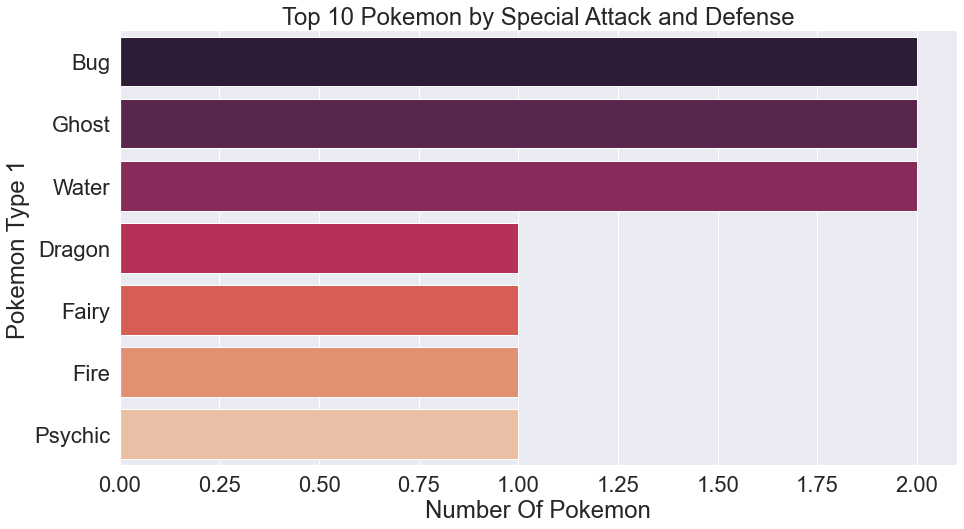

In [50]:
plt.figure(figsize=(15, 8))
topSpChart= sns.barplot(data=topSp,
            x='Number Of Pokemon',
            y=topSp.index, palette="rocket")
topSpChart.set( ylabel='Pokemon Type 1', title='Top 10 Pokemon by Special Attack and Defense')

# Conclusion


## So what have we learnt? 

Well we have learnt several things from our analysis. 
The first thing: If you can catch a Legendary DO IT! These Pokemon have incredible stats, almost double that of the top 10 with normal status. So a Legendary Pokemon is definitely a huge advantage and asset to any team. 


So our question was what Pokemon are an absolute must have for your team, having analysed several different types of stats it is very clear that Dragon and Water types are absolute non negotibles. They appear top in every analysis we ran, so thats 2 of your team spots filled. 
Fire is another one we see that is a powefrul type, while its not in the top 10 for total points it is the 2nd most frequent type when we expand the search to the top 50 pokemon. 
Bug and Ghost were tops when it came to Sp Attack and Defense, which is almost surprising considering they did not feature at all in the Top 10 and Bug made 1 appearance in the top 50.That being said Special Attack and Defense are very powerful tools and in a long haul battle like the final one these are 2 stats you want in abundance so I would highly recommend having one of each of these on your team too. 

So to sum up:
* Get yourself a Legendary Pokemon, You will be at a great advantage in the final battle with one on your team.
* Make sure you have a Fire and a Dragon type on your team. These types are all round high in stats and will help you through. 
* Get yourself a Bug and Ghost Type for your team to ensure those Special Attacks are landing and that Special Defense will hopefully get you through that final battle!


### Limitations

The against columns were something i was really looking forward to analysing, but unfortunately 4 pokemon having incorrect values means that I would have to make an assumption to analyse this and I already have some pretty solid analysis with full data so i did not do this. 
That being said if i was to take the assumption that those values were either null and omit them or that they needed a decimal point in there, we could say that looking at that top 10, ice or rock pokemon would be pretty good all rounders to have in battle as their avereage stats against every species is the highest in our data.

Another limitation is the Null values in the Type 2 column. We could absolutely still analyse this with the nulls but as it does not feature over every generation evenly it woul be unfair to say this is the type combination you should have. 